In [1]:
import pickle 
import pandas as pd 
import sklearn.feature_selection as fs
import sklearn.linear_model as lm
import io, os, sys, types
import nbimporter

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
import Models
import matplotlib.pyplot as plt


Importing Jupyter notebook from Models.ipynb


In [2]:


Data=pd.read_excel('FinalDataSet.xlsx',index_col='id')
Features=Data.columns[5:]
NumberOfFeatures = len(Features)

Target=Data.columns[4]
DataSize=len(Data)
# Training Range
TrainingData=Data.iloc[0:int(DataSize*(7/10))]
# Testing Range / forecasting range
TestData = Data.iloc[ int(DataSize*(7/10)):  int(DataSize *(9/10))  ]

# BetData will be used for  test our method result  with bet ratio of famous bet companies
BetData = Data.iloc[ int(DataSize*(9/10)):]


In [3]:
##################### Features Selectionss#########################

# 2.2.1. Least Absolute Shrinkage and Selection Operator

lasso = fs.SelectFromModel(estimator=lm.Lasso(alpha=0.1)).fit(TrainingData[Features], TrainingData[Target])
LassoNumber=lasso.get_support(indices=True)

LassoFeatures=Features[LassoNumber]

LassoTrainingData=TrainingData[LassoFeatures]
LassoTestingData=TestData[LassoFeatures]
LassoBetData=BetData[LassoFeatures]
print(  str(TrainingData.shape[1]) + ' Dimension is reduced to ' +str(LassoTrainingData.shape[1] ) + ' Dimension')

print('Slected FeaturesFeatures : ')
print(LassoFeatures.values)


48 Dimension is reduced to 26 Dimension
Slected FeaturesFeatures : 
['HomePlayer_2_Overall' 'HomePlayer_3_Overall' 'HomePlayer_4_Overall'
 'HomePlayer_5_Overall' 'HomePlayer_6_Overall' 'HomePlayer_8_Overall'
 'HomePlayer_9_Overall' 'HomePlayer_10_Overall' 'HomePlayer_11_Overall'
 'AwayPlayer_3_Overall' 'AwayPlayer_4_Overall' 'AwayPlayer_5_Overall'
 'AwayPlayer_7_Overall' 'AwayPlayer_8_Overall' 'AwayPlayer_9_Overall'
 'AwayPlayer_10_Overall' 'Last_5_match_goal_diff_home '
 'Last_5_match_goal_diff_away ' 'Last_5_match_btw' 'Team_variance_home '
 'Last_5_match_shout_total_home ' 'Last_5_match_shout_on_home '
 'Last_5_match_corner_home ' 'Last_5_match_shout_total_Away '
 'Last_5_match_faul_Away ' 'Last_5_match_corner_Away ']


In [4]:
with open('TrainingObjects/ANNModelRawObject.pickle', 'rb') as handle:
    ANNModelRawObject = pickle.load(handle)

In [5]:
with open('TrainingObjects/XGBoostModelLassoObject.pickle', 'rb') as handle:
    XGBoostModelLassoObject = pickle.load(handle)

In [6]:
with open('TrainingObjects/XGBoostModelRawDataObject.pickle', 'rb') as handle:
    XGBoostModelRawDataObject = pickle.load(handle)

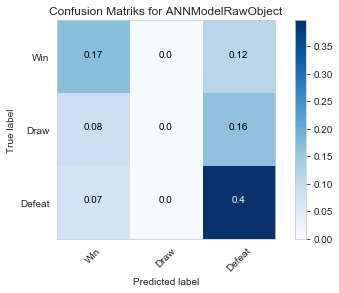

C:\Users\Ridvan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ridvan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    F1Score  AccurancyRate       MSE       MAE  PrecisionScore
ANNModelRawObject  0.414838       0.564264  1.000371  0.624071        0.367826


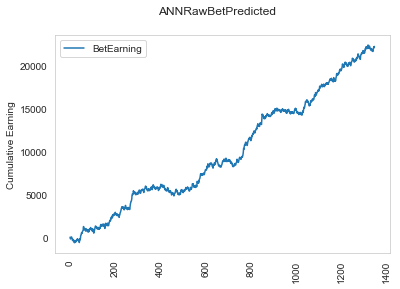

In [7]:
ANNRawPredicted=ANNModelRawObject.predict(TestData[Features])

Models.ResultGraph(TestData[Target],ANNRawPredicted,'ANNModelRawObject')
print(Models.ResultInfo(TestData[Target],ANNRawPredicted,'ANNModelRawObject'))

ANNRawBetPredicted=ANNModelRawObject.predict(BetData[Features])
Models.BetResult(BetData,ANNRawBetPredicted,'ANNRawBetPredicted')

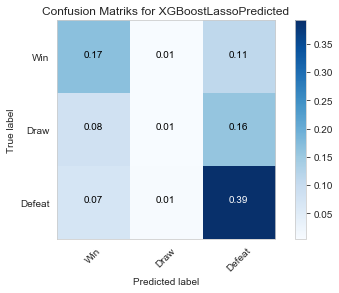

                        F1Score  AccurancyRate       MSE       MAE  \
XGBoostLassoPredicted  0.433615        0.56575  0.988417  0.615156   

                       PrecisionScore  
XGBoostLassoPredicted        0.489139  


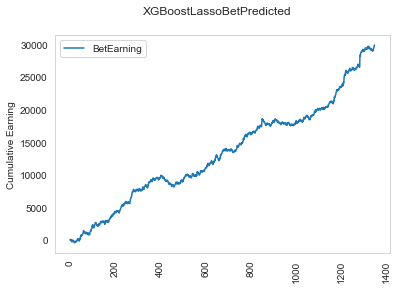

In [8]:

XGBoostLassoPredicted=XGBoostModelLassoObject.predict(LassoTestingData)

Models.ResultGraph(TestData[Target],XGBoostLassoPredicted,'XGBoostLassoPredicted')
print(Models.ResultInfo(TestData[Target],XGBoostLassoPredicted,'XGBoostLassoPredicted'))


XGBoostLassoBetPredicted=XGBoostModelLassoObject.predict(LassoBetData)

Models.BetResult(BetData,XGBoostLassoBetPredicted,'XGBoostLassoBetPredicted')

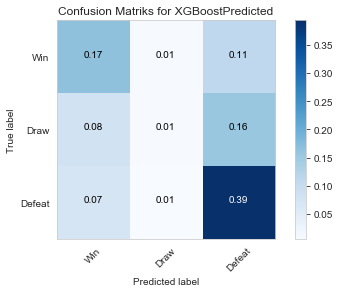

                   F1Score  AccurancyRate       MSE       MAE  PrecisionScore
XGBoostPredicted  0.438952       0.567979  0.985029  0.611441        0.503162


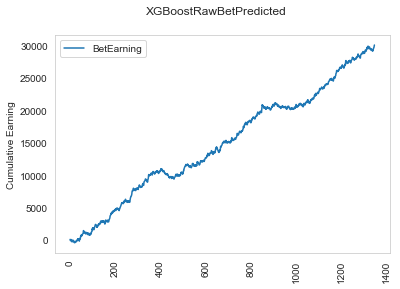

In [9]:

XGBoostRawPredicted=XGBoostModelRawDataObject.predict(TestData[Features])

Models.ResultGraph(TestData[Target],XGBoostRawPredicted,'XGBoostPredicted')
print(Models.ResultInfo(TestData[Target],XGBoostRawPredicted,'XGBoostPredicted'))

XGBoostRawBetPredicted=XGBoostModelRawDataObject.predict(BetData[Features])

Models.BetResult(BetData,XGBoostRawBetPredicted,'XGBoostRawBetPredicted')